### OKC - Exploratory Analysis

We will look for interesting correlations within the data and briefly explore any interesting trends that we come across. Finally, we will experiment with some machine learning algorithms. 


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [56]:
#okc_df = pd.read_csv('okc_bullied.txt', sep='\t', low_memory=False)
okc_master_df = pd.read_csv('user_data_public.csv', sep=',', low_memory=False)
okc_master_df.shape

(68371, 2625)

In [57]:
okc_bullied_df = okc_master_df[okc_master_df['q38555'].notnull()]
okc_bullied_df.shape

(12527, 2625)

(-1.1050038013334962,
 1.100238276253976,
 -1.1150998817569091,
 1.1100890449549958)

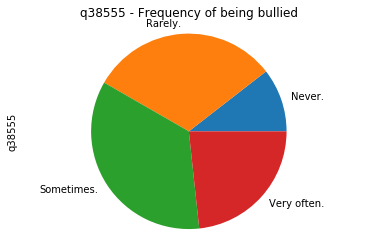

In [58]:
#sort_index conveniently sorts the pie graph so rarely and never are next to eachother.
okc_bullied_df['q38555'].value_counts().sort_index().plot.pie()
plt.title('q38555 - Frequency of being bullied')
plt.axis('equal')

Our distribution shows that the vast majority of the OKC user sample has been bullied at some point during the childhood. Additionally, the majority of the users were bullied occasionally (sometimes) and frequently (very often). 

It is worth noting that the line between rarely, sometimes, and very often may be subjective, as each individual may interpret their frequency of being bullied differently.

Next, we will see if there is any correlation between childhood bullying and adult happiness.  
q4018 - Are you happy with your life?

In [59]:
happy_corr = pd.get_dummies(okc_bullied_df[okc_bullied_df['q4018'].notnull()], columns=['q38555','q4018'])[['q38555_Never.','q38555_Rarely.','q38555_Sometimes.','q38555_Very often.','q4018_No','q4018_Yes']].corr()
happy_corr[['q4018_No','q4018_Yes']].head(4)


,q4018_No,q4018_Yes
q38555_Never.,-0.053113,0.053113
q38555_Rarely.,-0.069727,0.069727
q38555_Sometimes.,0.002755,-0.002755
q38555_Very often.,0.113326,-0.113326


There seems to be a very weak negative correlation between frequency of childhood bullying and current happiness and in this data set.

How about hard drugs?  
q80 -	What's your deal with harder drugs (stuff beyond pot)?

In [60]:
drug_corr = pd.get_dummies(okc_bullied_df[okc_bullied_df['q80'].notnull()], columns=['q38555','q80'])[['q38555_Never.','q38555_Rarely.','q38555_Sometimes.','q38555_Very often.','q80_I never do drugs.',"q80_I've done drugs in the past, but no longer.",'q80_I do drugs occasionally.','q80_I do drugs regularly.']].corr()
drug_corr[['q80_I never do drugs.',"q80_I've done drugs in the past, but no longer.",'q80_I do drugs occasionally.','q80_I do drugs regularly.']].head(4)


,q80_I never do drugs.,"q80_I've done drugs in the past, but no longer.",q80_I do drugs occasionally.,q80_I do drugs regularly.
q38555_Never.,0.013255,-0.000637,-0.023741,0.005151
q38555_Rarely.,0.000806,0.015132,-0.022494,-0.015689
q38555_Sometimes.,-0.019612,0.012800,0.015099,-0.004029
q38555_Very often.,0.011641,-0.030486,0.024700,0.017975


In [61]:
okc_bullied_df['q80'].value_counts(normalize=True)

I never do drugs.                              0.706732
I've done drugs in the past, but no longer.    0.219908
I do drugs occasionally.                       0.070129
I do drugs regularly.                          0.003230
Name: q80, dtype: float64

Based off of the above, there does not seem to be a significant correlation between childhood bullying and hard drug use. 

Interestingly, about 70% of the OKC user base claimed to have never done drugs. 7% of the users do drugs occasionally and .3% do drugs regularly. This is in line with the Substance Abuse and Mental Health Services Administration's claim that "9.4 percent of the population—had used an illicit drug in the past month."(https://www.drugabuse.gov/publications/drugfacts/nationwide-trends)

It is possilbe that the usage rate is lower on OKC (7.3% vs 9.4%) because people do not want to admit on a public site that they do illegal hard drugs.

Next, we will see if childhood bullying has any impact on cognitive abilities. This will be a number computed by grading a user's repsonse to a number of questions with an absolute right or wrong answer. These questions used in this index will be attached in the appendix. The cognitive ability index is inspired by Kirkegaard's analysis on the same data set (https://openpsych.net/files/papers/Kirkegaard_2016g.pdf)



In [62]:
cog_df = pd.read_csv('cog_text.txt', sep='\t', low_memory=False)
cog_df.shape

(14, 8)

In [63]:
def getCogIndx(row):
    
    cog_index = None
    answered_questions = 0
    total_score = 0 #perhaps introduce question and answer weights
    
    for index, question in cog_df.iterrows():
        column = question['Column']
        correct_answer = question["option_"+str(question['option_correct'])]
        
        user_answer = row[column]
        
        if(user_answer is np.nan):
            pass #user did not answer question
        else:
            answered_questions += 1
            if(user_answer == correct_answer):
                total_score +=1
            #else:
                #total_score +=-.25 #punish wrong answers, like SATs
                
    if(answered_questions > 0):
        cog_index = total_score / answered_questions
    #else:
     #   print('no questions answered')

    return cog_index 



In [64]:
okc_cog_df = okc_master_df.copy()

In [65]:
okc_cog_df['cog_indx'] = okc_cog_df.apply(getCogIndx, axis=1)

In [66]:
okc_cog_df['cog_indx'].describe()

count    68371.000000
mean         0.400669
std          0.263777
min          0.000000
25%          0.200000
50%          0.444444
75%          0.600000
max          0.857143
Name: cog_indx, dtype: float64

There are definitely issues with this method of cognitive measurement. This method assumes that all questions equally determine one's cognitive ability. Additionally, users would possibly be able to copy and paste the question into a search engine and easily get the answer. Surprisingly, nobody in this data set had a perfect score (1), even with that possibility. 

We'll normalize the cog index between 0 and 1 to keep it in line with the other values we are testing against.

In [67]:
#normalize the cog indx between 0 and 1
min_max_scaler = MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(okc_cog_df['cog_indx'].values.reshape(-1,1) )
df_normalized = pd.DataFrame(np_scaled)
okc_cog_df['cog_indx_norm'] = df_normalized

In [68]:
religion_cog_corr = pd.get_dummies(okc_cog_df[okc_cog_df['q41'].notnull()], columns=['q41'])[['q41_Not at all important','q41_Not very important','q41_Somewhat important','q41_Extremely important','cog_indx_norm']].corr()
religion_cog_corr['cog_indx_norm'].head(4)

q41_Not at all important    0.184544
q41_Not very important     -0.030840
q41_Somewhat important     -0.109350
q41_Extremely important    -0.119136
Name: cog_indx_norm, dtype: float64

We can see a weak correlation of .185 between non religious individuals and their cog index.

How about political views?  
- q166 - Politically, which way do you lean?

In [69]:
okc_cog_df['q166'].value_counts(normalize=True)

To the left (democrat in the US)       0.600478
To the middle / I don't know           0.297593
To the right (republican in the US)    0.101929
Name: q166, dtype: float64

(-1.1130087588207025,
 1.1006194647057477,
 -1.1013581092619755,
 1.113048689756877)

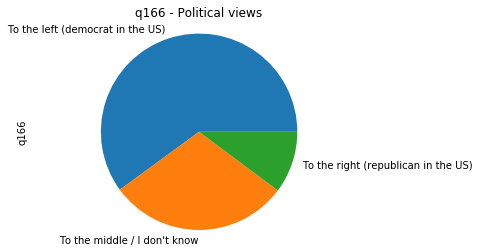

In [70]:
okc_cog_df['q166'].value_counts(normalize=True).plot.pie()
plt.title('q166 - Political views')
plt.axis('equal')

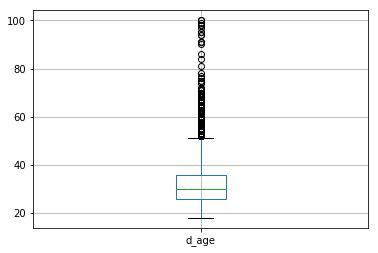

In [71]:
okc_cog_df.boxplot(column="d_age")

In [73]:
political_cog_corr = pd.get_dummies(okc_cog_df[okc_cog_df['q166'].notnull()], columns=['q166'])[['q166_To the left (democrat in the US)',"q166_To the middle / I don't know",'q166_To the right (republican in the US)','cog_indx_norm']].corr()
political_cog_corr['cog_indx_norm'].head(3)

q166_To the left (democrat in the US)       0.178054
q166_To the middle / I don't know          -0.118222
q166_To the right (republican in the US)   -0.109601
Name: cog_indx_norm, dtype: float64

From the pie graph, we can see that the majority (60%) of the users are left leaning, with a minority (10%) leaning to the right. This disparity is most likely due to the typical user being younger (see box plot) and living in a metro area, which has been shown to be highly correlated with left leaning views. 

There is also a weak positive correlation (.178) between cog index and people who lean to the left. Conversely, there is a weak negative correlation between those in the middle (-.118) and right (-.110).

<hr/>

### K-means clustering

Next, we will try some k-means clustering on the data. First, we will grab all the users who have a 'drug friendly' rating. It is not certain how this rating is calculated, and it is possible that users only have a 'drug friendly' rating if they are drug friendly at some level, as the min (un-normalized) value is 2 and max is 99.

As most of our data is in text form, will need to convert the features into numbers before running it through the algorithm. Instead of creating dummy variables, it might be a better idea to convert the data into a number, as it is ordinal. The conversion values were created with 0 indicating that the user abstains from whatever activity, and 1 indicating that the user participates or is in favor of said activity. Answers that lie in between are assigned a value based on how close the answer is to either end of the spectrum.    

In [74]:
okc_drugs_df = okc_cog_df[okc_cog_df['p_drug'].notnull()].copy()
okc_drugs_df.shape

(4481, 2627)

In [75]:
#normalize the p_drug between 0 and 1 (down from 0 to 100)
min_max_scaler = MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(okc_drugs_df['p_drug'].values.reshape(-1,1) )
okc_drugs_df['p_drug_norm'] = np_scaled

In [76]:
def getHardDrugIndx(row):
    
    if(row['q80'] == 'I do drugs occasionally.'):
        return .75
    elif(row['q80'] == "I've done drugs in the past, but no longer."):
        return .5
    elif(row['q80'] == "I do drugs regularly."):
        return 1
    elif(row['q80'] == "I never do drugs."):
        return 0
    else:
        return None
    
def getDrugDatePrefIndx(row):
    
    if(row['q9688'] == 'Yes'):
        return 1
    elif(row['q9688'] == "Yes, but only soft stuff like marijuana"):
        return .75
    elif(row['q9688'] == "No"):
        return 0
    else:
        return None
    
def getAlcoholIndx(row):
    if(row['q77'] == 'Very often'):
        return 1
    elif(row['q77'] == "Sometimes"):
        return .66
    elif(row['q77'] == "Rarely"):
        return .33
    elif(row['q77'] == "Never"):
        return 0
    else:
        return None

In [77]:
okc_drugs_df['hard_drug_indx'] = okc_drugs_df.apply(getHardDrugIndx, axis=1)
okc_drugs_df['drug_date_pref_indx'] = okc_drugs_df.apply(getDrugDatePrefIndx, axis=1)
okc_drugs_df['alcohol_indx'] = okc_drugs_df.apply(getAlcoholIndx, axis=1)

In [78]:
okc_drugs_df_cleaned = okc_drugs_df.dropna(subset=[['hard_drug_indx','drug_date_pref_indx','alcohol_indx']]).copy()
okc_drugs_df_cleaned.shape

(3969, 2631)

In [79]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(okc_drugs_df_cleaned[['hard_drug_indx','drug_date_pref_indx','alcohol_indx']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [80]:
okc_drugs_df_cleaned['cluster'] = kmeans.labels_
okc_drugs_df_cleaned.groupby(['cluster']).mean()[['p_drug_norm','cog_indx_norm','p_conf','p_adven','p_progress','p_geeky']]

,p_drug_norm,cog_indx_norm,p_conf,p_adven,p_progress,p_geeky
cluster,,,,,,
0,0.575217,0.625087,37.786561,37.643733,15.159574,12.400361
1,0.272472,0.619976,32.910256,7.090301,10.250000,17.422222
2,0.582770,0.589997,39.429467,43.509434,14.875000,-3.564593


- Cluster 0 is the most drug friendly group as well as the most confident, most adventurous, least intelligent (cog index), and least geeky.
- Cluster 2 is the least drug friendly group as well as the least confident, least adventurous, least progressive, and most geeky.
- Cluster 1 is very similar to Cluster 0, though it is much more geeky than cluster 1


### Appendix

In [81]:
#cognitive questions
cog_df.head(14)

,Column,ID,text,option_1,option_2,option_3,option_4,option_correct
0,q178,178,Which is bigger?,The earth,The sun,NaN,NaN,2
1,q255,255,STALE is to STEAL as 89475 is to...,89457,98547,89754,89547,4
2,q1201,1201,"What is next in this series? 1, 4, 10, 19, 31, _",36,48,46,Don't know / don't care,3
3,q14835,14835,"If you turn a left-handed glove inside out, it...",On my left hand,On my right hand,NaN,NaN,2
4,q8672,8672,In the line 'Wherefore art thou Romeo?' what d...,Why,Where,How,Who cares / wtf?,1
5,q18154,18154,How many fortnights are in a year?,52,14,26,365,3
6,q12625,12625,Half of all policemen are thieves and half of ...,Yes,No,NaN,NaN,2
7,q477,477,Which is longer?,A mile,A kilometer,I don't know!,NaN,1
8,q256,256,When birds stand on power lines and don't get ...,"Good timing, they only land between calls",Body materials that are insulated from current,Not touching anything else at the same time,"They do get hurt, they just express it poorly",3
9,q43639,43639,Etymology is...,The study of culinary arts.,The study of insects.,The study of the origins of words.,I don't know.,3
